Ce notebook permet de comparer les résultats des algorithmes **CAC**,**CACLA** et **CACLA+VAR** avec une stratégie d'exploration gaussienne et $\epsilon$-greedy sur l'environnement **CartPole Continuous** du papier  https://www.researchgate.net/publication/4249966_Reinforcement_Learning_in_Continuous_Action_Spaces/link/0912f5093a214c7f1b000000/download

Fait par Jérémy DUFOURMANTELLE et Ethan ABITBOL

In [1]:
import matplotlib.pyplot as plt
import torch
import sys
import numpy as np

sys.path.insert(0, '../')
from utils.CartPoleContinuous import ContinuousCartPoleEnv
from utils.Critic import CriticNetwork
from utils.Actor import ActorNetwork
from utils.CAC import CAC
from utils.CACLA import CACLA
from utils.CACLAVAR import CACLAVAR
from utils.CACLA_batch import CACLAbatch

from tqdm import tqdm

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nb_tests_global = 20

# Gaussian Exploration

### CAC with gaussian exploration

In [3]:
success_cac = 0
fails_cac = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_cac = list()
matrice_simulation_iteration_cac = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )
    cac = CAC(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.9,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 50000,
        nb_tests = 1,
        test_frequency = 100,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "gaussian",
        verbose_mode = False
    )
    cac.learning()
    matrice_simulation_rewards_cac.append(cac.list_rewards_mean)
    matrice_simulation_iteration_cac.append(cac.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  cac.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter != env.max_iteration :
        fails_cac += 1
    else :
        success_cac += 1    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [32:27<00:00, 97.39s/it]


114581


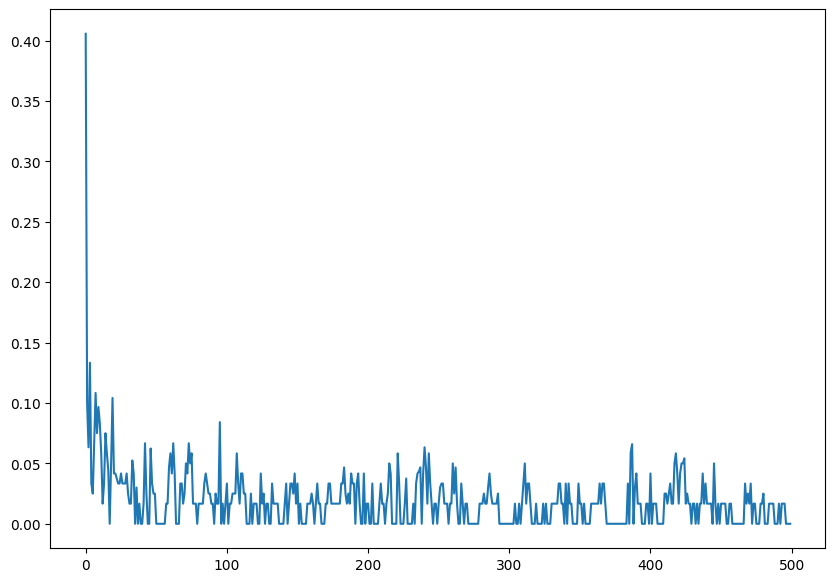

In [4]:
matrice_simulation_iteration_cac = np.array(matrice_simulation_iteration_cac)
print(matrice_simulation_iteration_cac.max())
matrice_simulation_rewards_cac = np.array(matrice_simulation_rewards_cac)
plt.figure(figsize=(10,7))
plt.plot(matrice_simulation_rewards_cac.mean(axis=0))

### CACLA batch version with gaussian exploration

In [5]:
success_caclab = 0
fails_caclab = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_caclab = list()
matrice_simulation_iteration_caclab = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )

    caclab = CACLAbatch(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.8,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 50000,
        nb_tests = 1,
        test_frequency = 100,
        batch_size : int,
        size_replay_buffer : int,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "gaussian",
        verbose_mode = False
    )
    
    caclab.learning()
    matrice_simulation_rewards_caclab.append(caclab.list_rewards_mean)
    matrice_simulation_iteration_caclab.append(caclab.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  caclab.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter != env.max_iteration :
        fails_caclab += 1
    else :
        success_caclab += 1    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [2:08:39<00:00, 386.00s/it]


### CACLA with gaussian exploration

In [6]:
success_cacla = 0
fails_cacla = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_cacla = list()
matrice_simulation_iteration_cacla = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )
    cacla = CACLAbatch(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.8,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 50000,
        nb_tests = 1,
        test_frequency = 100,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "gaussian",
        verbose_mode = False
    )
    
    cacla.learning()
    matrice_simulation_rewards_cacla.append(cacla.list_rewards_mean)
    matrice_simulation_iteration_cacla.append(cacla.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  cacla.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter != env.max_iteration :
        fails_cacla += 1
    else :
        success_cacla += 1    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [2:05:49<00:00, 377.46s/it]


### CACLA+VAR with gaussian exploration

In [7]:
success_caclavar = 0
fails_caclavar = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_caclavar = list()
matrice_simulation_iteration_caclavar = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )
    caclavar = CACLAVAR(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.95,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 50000,
        nb_tests = 1,
        test_frequency = 100,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "gaussian",
        verbose_mode = False
    )
    caclavar.learning()
    matrice_simulation_rewards_caclavar.append(caclavar.list_rewards_mean)
    matrice_simulation_iteration_caclavar.append(caclavar.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  caclavar.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter != env.max_iteration :
        fails_caclavar += 1
    else :
        success_caclavar += 1    

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [2:11:36<00:00, 394.80s/it]


In [8]:
print(f"[gaussian] Nombre de tests : {nb_tests}")
print("------------------------------------")
print(f"[gaussian] Nombre de succes CAC: {success_cac}")
print(f"[gaussian] Nombre d'echecs CAC: {fails_cac}")
print(f"[gaussian] Ratio de succes pour CAC: {success_cac/(success_cac+fails_cac)*100}%")
print("------------------------------------")
print(f"[gaussian] Nombre de succes CACLA: {success_cacla}")
print(f"[gaussian] Nombre d'echecs CACLA: {fails_cacla}")
print(f"[gaussian] Ratio de succes pour CACLA: {success_cacla/(success_cacla+fails_cacla)*100}%")
print("------------------------------------")
print(f"[gaussian] Nombre de succes CACLA batch : {success_caclab}")
print(f"[gaussian] Nombre d'echecs CACLA batch : {fails_caclab}")
print(f"[gaussian] Ratio de succes pour CACLA batch : {success_caclab/(success_caclab+fails_caclab)*100}%")
print("------------------------------------")
print(f"[gaussian] Nombre de succes CACLAVAR: {success_caclavar}")
print(f"[gaussian] Nombre d'echecs CACLAVAR: {fails_caclavar}")
print(f"[gaussian] Ratio de succes pour CACLAVAR: {success_caclavar/(success_caclavar+fails_caclavar)*100}%")

[gaussian] Nombre de tests : 20
------------------------------------
[gaussian] Nombre de succes CAC: 0
[gaussian] Nombre d'echecs CAC: 20
[gaussian] Ratio de succes pour CAC: 0.0%
------------------------------------
[gaussian] Nombre de succes CACLA: 18
[gaussian] Nombre d'echecs CACLA: 2
[gaussian] Ratio de succes pour CACLA: 90.0%
------------------------------------
[gaussian] Nombre de succes CACLA batch : 20
[gaussian] Nombre d'echecs CACLA batch : 0
[gaussian] Ratio de succes pour CACLA batch : 100.0%
------------------------------------
[gaussian] Nombre de succes CACLAVAR: 19
[gaussian] Nombre d'echecs CACLAVAR: 1
[gaussian] Ratio de succes pour CACLAVAR: 95.0%


In [ ]:
def rewards_normalization(matrice_simulation_rewards) :
    dist_max = -200
    dist_min = 0
    arr = np.array(matrice_simulation_rewards)
    # return 1 - ( arr / (dist_max - dist_min)).mean(axis=0)
    return arr.mean(axis=0)

In [ ]:
l_cac = rewards_normalization(matrice_simulation_rewards_cac)
l_cacla = rewards_normalization(matrice_simulation_rewards_cacla)
l_caclab = rewards_normalization(matrice_simulation_rewards_caclab)
l_caclavar = rewards_normalization(matrice_simulation_rewards_caclavar)

In [ ]:
m_iter_caclavar = np.array(matrice_simulation_iteration_caclavar)
x_iter_caclavar = m_iter_caclavar.mean(axis=0)

m_iter_cacla = np.array(matrice_simulation_iteration_cacla)
x_iter_cacla = m_iter_cacla.mean(axis=0)

m_iter_caclab = np.array(matrice_simulation_iteration_caclab)
x_iter_caclab = m_iter_caclab.mean(axis=0)

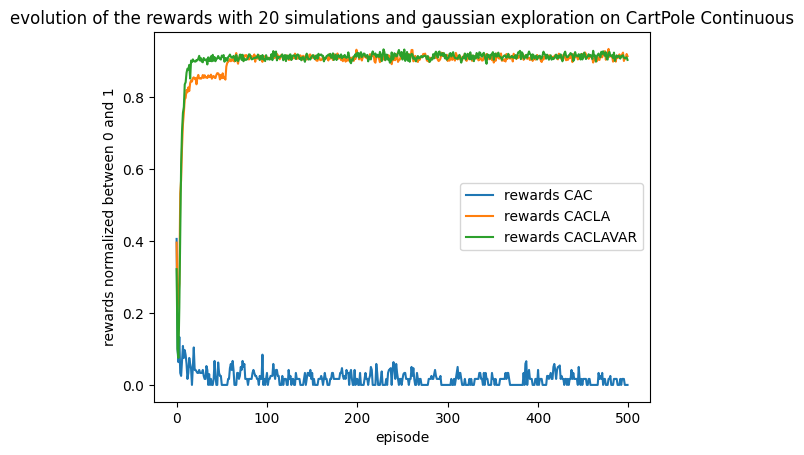

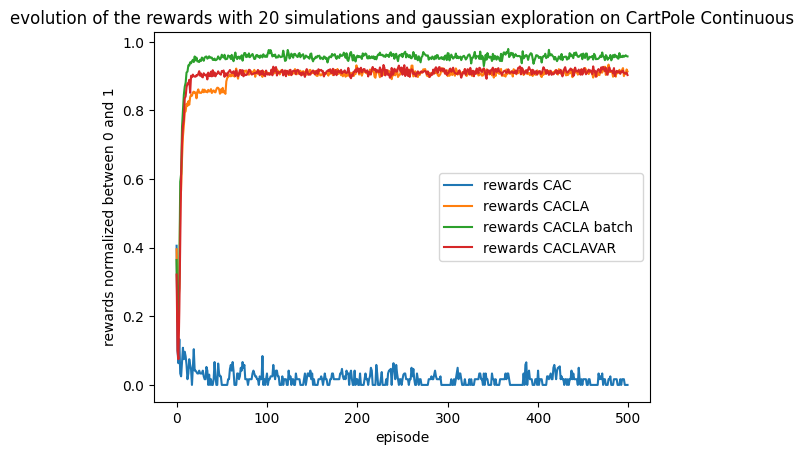

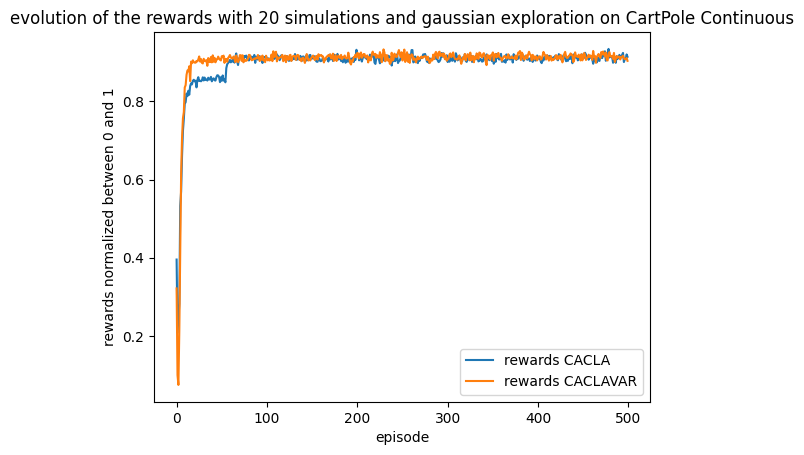

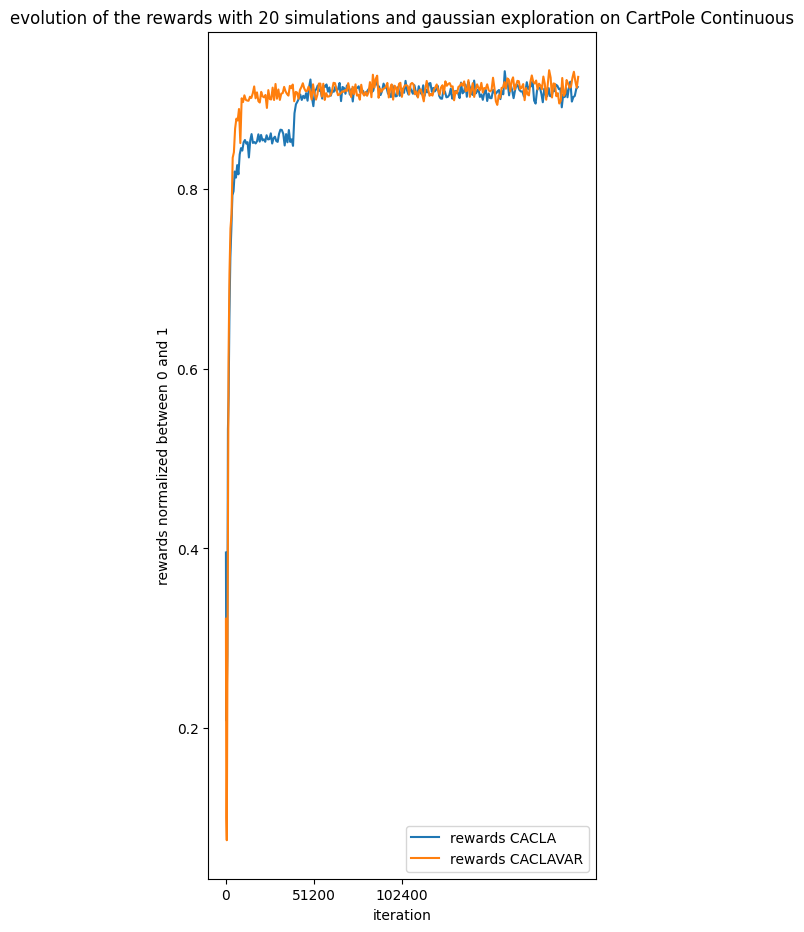

In [ ]:
plt.figure()
plt.title(f"evolution of the rewards with {nb_tests} simulations and gaussian exploration on CartPole Continuous")
plt.xlabel("episode")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(l_cac, label="rewards CAC")
plt.plot(l_cacla, label="rewards CACLA")
plt.plot(l_caclavar, label="rewards CACLAVAR")
plt.legend()
plt.show()

plt.figure()
plt.title(f"evolution of the rewards with {nb_tests} simulations and gaussian exploration on CartPole Continuous")
plt.xlabel("episode")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(l_cac, label="rewards CAC")
plt.plot(l_cacla, label="rewards CACLA")
plt.plot(l_caclab, label="rewards CACLA batch ")
plt.plot(l_caclavar, label="rewards CACLAVAR")
plt.legend()
plt.show()

plt.figure()
plt.title(f"evolution of the rewards with {nb_tests} simulations and gaussian exploration on CartPole Continuous")
plt.xlabel("episode")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(l_cacla, label="rewards CACLA")
plt.plot(l_caclavar, label="rewards CACLAVAR")
plt.legend()
plt.show()

plt.figure(figsize=(5,11))
plt.title(f"evolution of the rewards with {nb_tests} simulations and gaussian exploration on CartPole Continuous")
plt.xlabel("iteration")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(x_iter_cacla[:int(len(x_iter_cacla)/2)],l_cacla[:int(len(x_iter_cacla)/2)], label="rewards CACLA")
plt.plot(x_iter_caclavar[:int(len(x_iter_caclavar)/2)],l_caclavar[:int(len(x_iter_caclavar)/2)], label="rewards CACLAVAR")
plt.xticks([0,51200,102400])
plt.legend()
plt.show()

In [ ]:
print("Resultats : ")
print("[gaussian] CAC : mean rewards -> ",l_cac.mean())
print("[gaussian] CAC : std rewards -> ",l_cac.std())
print("[gaussian] CACLA : mean rewards -> ",l_cacla.mean())
print("[gaussian] CACLA : std rewards -> ",l_cacla.std())
print("[gaussian] CACLAVAR : mean rewards -> ",l_caclavar.mean())
print("[gaussian] CACLAVAR : std rewards -> ",l_caclavar.std())

Resultats : 
[gaussian] CAC : mean rewards ->  0.019337817279339017
[gaussian] CAC : std rewards ->  0.026225877523674973
[gaussian] CACLA : mean rewards ->  0.8965112056468661
[gaussian] CACLA : std rewards ->  0.06460920085135012
[gaussian] CACLAVAR : mean rewards ->  0.9029421271843975
[gaussian] CACLAVAR : std rewards ->  0.07238632784951636


# $\epsilon$-greedy Exploration

### CAC with $\epsilon$-greedy exploration

In [23]:
success_cac = 0
fails_cac = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_cac = list()
matrice_simulation_iteration_cac = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )
    cac = CAC(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.9,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 75000,
        nb_tests = 1,
        test_frequency = 100,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "egreedy",
        verbose_mode = False
    )
    cac.learning()
    matrice_simulation_rewards_cac.append(cac.list_rewards_mean)
    matrice_simulation_iteration_cac.append(cac.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  cac.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter != env.max_iteration :
        fails_cac += 1
    else :
        success_cac += 1

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [46:12<00:00, 138.63s/it]


### CACLA with $\epsilon$-greedy exploration

In [24]:
success_cacla = 0
fails_cacla = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_cacla = list()
matrice_simulation_iteration_cacla = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )
    cacla = CACLA(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.95,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 75000,
        nb_tests = 1,
        test_frequency = 100,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "egreedy",
        verbose_mode = False
    )
    cacla.learning()
    matrice_simulation_rewards_cacla.append(cacla.list_rewards_mean)
    matrice_simulation_iteration_cacla.append(cacla.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  cacla.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter != env.max_iteration :
        fails_cacla += 1
    else :
        success_cacla += 1    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [38:35<00:00, 115.75s/it]


### CACLA+VAR with $\epsilon$-greedy exploration

In [25]:
success_caclavar = 0
fails_caclavar = 0
nb_tests = nb_tests_global

matrice_simulation_rewards_caclavar = list()
matrice_simulation_iteration_caclavar = list()

for i in tqdm(range(nb_tests)) : 
    env = ContinuousCartPoleEnv()
    actor_network = ActorNetwork(
        nb_neurons = 12,
        action_space = env.action_space,
        observation_space = env.observation_space
    )
    critic_network = CriticNetwork(
        nb_neurons = 12,
        observation_space = env.observation_space
    )
    caclavar = CACLAVAR(
        learning_rate_critic = 0.01,
        learning_rate_actor = 0.01,
        discount_factor = 0.99,
        epsilon = 1.0,
        epsilon_min = 0.01,
        epsilon_decay = 0.01,
        sigma = 0.3,
        nb_episode = 75000,
        nb_tests = 1,
        test_frequency = 100,
        env = env,
        actor_network = actor_network,
        critic_network = critic_network,
        exploration_strategy = "egreedy",
        verbose_mode = False
    )
    caclavar.learning()
    matrice_simulation_rewards_caclavar.append(caclavar.list_rewards_mean)
    matrice_simulation_iteration_caclavar.append(caclavar.list_iteration)
    
    state = env.reset()
    done = False
    nb_iter = 0
    while not done and nb_iter < env.max_iteration:
        state_t = torch.as_tensor(state , dtype=torch.float32)
        action =  caclavar.best_model(state_t).detach().numpy()
        new_state, reward, done = env.step(action)
        state = new_state
        nb_iter += 1
    
    if nb_iter != env.max_iteration :
        fails_caclavar += 1
    else :
        success_caclavar += 1    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [47:37<00:00, 142.88s/it]


In [26]:
print(f"[egreedy] Nombre de tests : {nb_tests}")
print("------------------------------------")
print(f"[egreedy] Nombre de succes CAC: {success_cac}")
print(f"[egreedy] Nombre d'echecs CAC: {fails_cac}")
print(f"[egreedy] Ratio de succes pour CAC: {success_cac/(success_cac+fails_cac)*100}%")
print("------------------------------------")
print(f"[egreedy] Nombre de succes CACLA: {success_cacla}")
print(f"[egreedy] Nombre d'echecs CACLA: {fails_cacla}")
print(f"[egreedy] Ratio de succes pour CACLA: {success_cacla/(success_cacla+fails_cacla)*100}%")
print("------------------------------------")
print(f"[egreedy] Nombre de succes CACLAVAR: {success_caclavar}")
print(f"[egreedy] Nombre d'echecs CACLAVAR: {fails_caclavar}")
print(f"[egreedy] Ratio de succes pour CACLAVAR: {success_caclavar/(success_caclavar+fails_caclavar)*100}%")

[egreedy] Nombre de tests : 20
------------------------------------
[egreedy] Nombre de succes CAC: 0
[egreedy] Nombre d'echecs CAC: 20
[egreedy] Ratio de succes pour CAC: 0.0%
------------------------------------
[egreedy] Nombre de succes CACLA: 0
[egreedy] Nombre d'echecs CACLA: 20
[egreedy] Ratio de succes pour CACLA: 0.0%
------------------------------------
[egreedy] Nombre de succes CACLAVAR: 0
[egreedy] Nombre d'echecs CACLAVAR: 20
[egreedy] Ratio de succes pour CACLAVAR: 0.0%


In [27]:
def rewards_normalization(matrice_simulation_rewards) :
    dist_max = -200
    dist_min = 0
    arr = np.array(matrice_simulation_rewards)
    # return 1 - ( arr / (dist_max - dist_min)).mean(axis=0)
    return arr.mean(axis=0)

In [28]:
l_cac = rewards_normalization(matrice_simulation_rewards_cac)
l_cacla = rewards_normalization(matrice_simulation_rewards_cacla)
l_caclavar = rewards_normalization(matrice_simulation_rewards_caclavar)

In [29]:
m_iter_caclavar = np.array(matrice_simulation_iteration_caclavar)
x_iter_caclavar = m_iter_caclavar.mean(axis=0)

m_iter_cacla = np.array(matrice_simulation_iteration_cacla)
x_iter_cacla = m_iter_cacla.mean(axis=0)

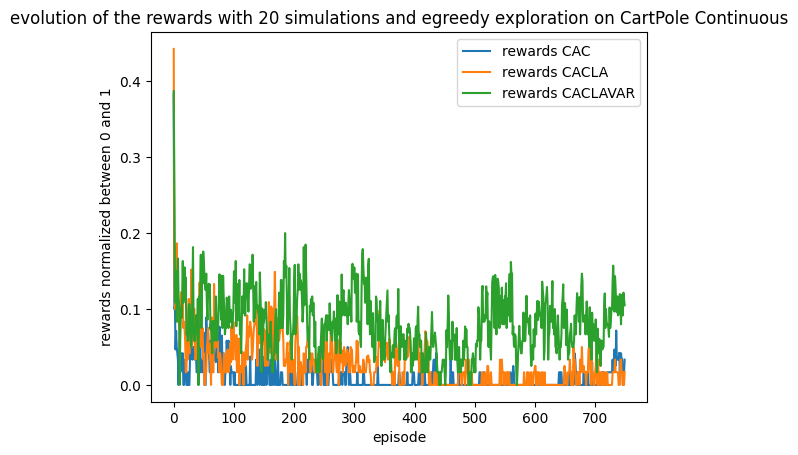

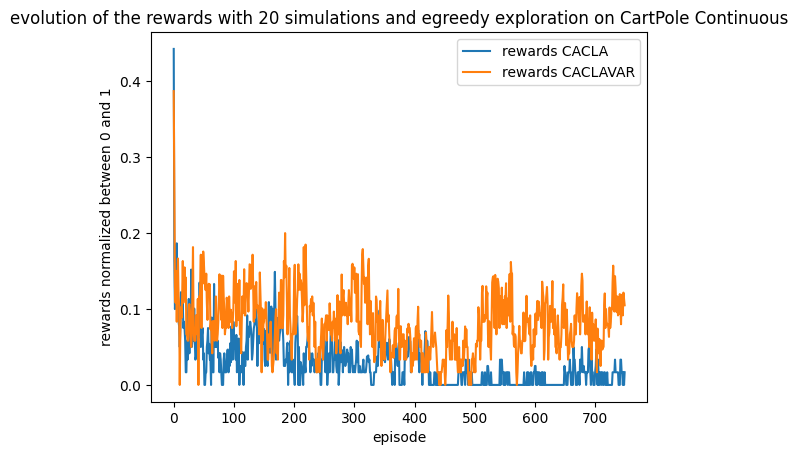

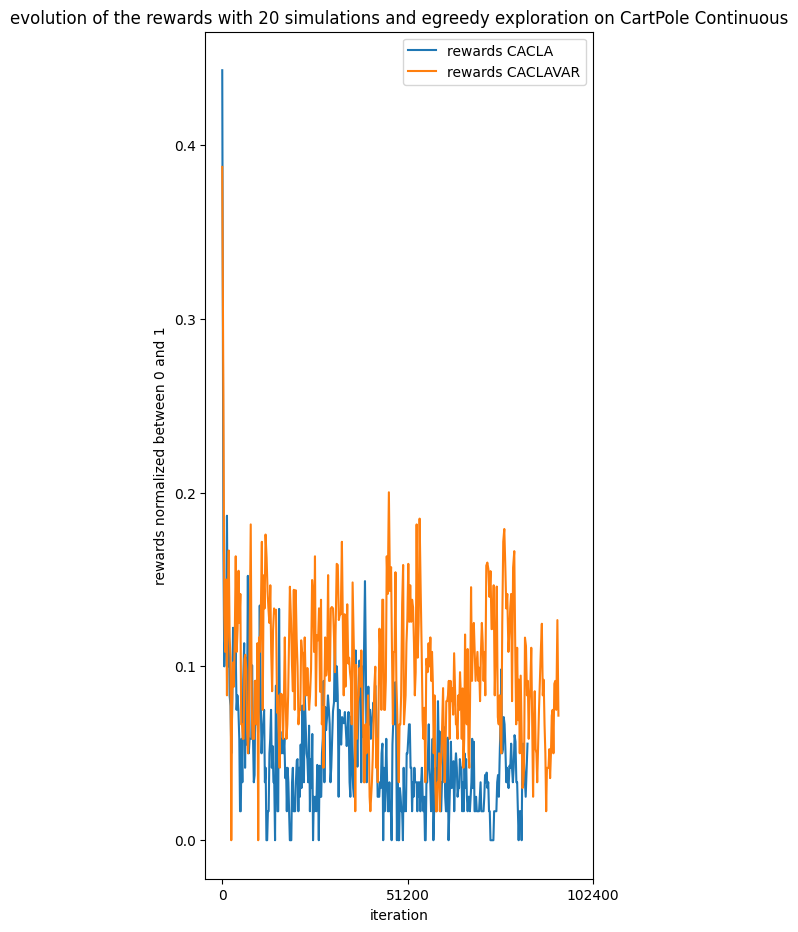

In [30]:
plt.figure()
plt.title(f"evolution of the rewards with {nb_tests} simulations and egreedy exploration on CartPole Continuous")
plt.xlabel("episode")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(l_cac, label="rewards CAC")
plt.plot(l_cacla, label="rewards CACLA")
plt.plot(l_caclavar, label="rewards CACLAVAR")
plt.legend()
plt.show()

plt.figure()
plt.title(f"evolution of the rewards with {nb_tests} simulations and egreedy exploration on CartPole Continuous")
plt.xlabel("episode")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(l_cacla, label="rewards CACLA")
plt.plot(l_caclavar, label="rewards CACLAVAR")
plt.legend()
plt.show()

plt.figure(figsize=(5,11))
plt.title(f"evolution of the rewards with {nb_tests} simulations and egreedy exploration on CartPole Continuous")
plt.xlabel("iteration")
plt.ylabel("rewards normalized between 0 and 1")
plt.plot(x_iter_cacla[:int(len(x_iter_cacla)/2)],l_cacla[:int(len(x_iter_cacla)/2)], label="rewards CACLA")
plt.plot(x_iter_caclavar[:int(len(x_iter_caclavar)/2)],l_caclavar[:int(len(x_iter_caclavar)/2)], label="rewards CACLAVAR")
plt.xticks([0,51200,102400])
plt.legend()
plt.show()

In [31]:
print("Resultats : ")
print("[egreedy] CAC : mean rewards -> ",l_cac.mean())
print("[egreedy] CAC : std rewards -> ",l_cac.std())
print("[egreedy] CACLA : mean rewards -> ",l_cacla.mean())
print("[egreedy] CACLA : std rewards -> ",l_cacla.std())
print("[egreedy] CACLAVAR : mean rewards -> ",l_caclavar.mean())
print("[egreedy] CACLAVAR : std rewards -> ",l_caclavar.std())

Resultats : 
[egreedy] CAC : mean rewards ->  0.010522649333237568
[egreedy] CAC : std rewards ->  0.021585171977486325
[egreedy] CACLA : mean rewards ->  0.02904059262451419
[egreedy] CACLA : std rewards ->  0.033409749674672216
[egreedy] CACLAVAR : mean rewards ->  0.08313817222332531
[egreedy] CACLAVAR : std rewards ->  0.04019805261257319
